<a href="https://colab.research.google.com/github/yw824/Alone_Machine_DeepLearninig/blob/main/02_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 어떻게 된 거지 ? 
길이가 25cm이고 무게가 150g 이라면 도미인데 예측모델에서는 빙어라고 예측함 

In [ ]:
# 데이터를 준비한다. 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

전에는 이 파이썬 리스트를 순회하면서 원소를 꺼내 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구현

이제는 넘파이를 배웠으니 훨씨 간편하게 생성 가능

In [ ]:
# 먼저 넘파이를 import
import numpy as np

numpy의 column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결


예를 들면 다음과 같은 2개의 리스트를 나란히 붙인다.

In [ ]:
np.column_stack( ( [ 1 , 2 , 3 ] , [ 4 , 5 , 6 ] ) )
# 연결할 리스트는 파이썬 튜플로 전달 
# 3개의 행과 2개의 열로 된 배열이 생성됨

array([[1, 4],
       [2, 5],
       [3, 6]])

그럼 이제 fish_length 와 fish_weight 합친다.

In [ ]:
fish_data = np.column_stack( ( fish_length , fish_weight ) )
# 처음 5개의 데이터만 출력해볼까 ? 
print( fish_data[ : 5] )

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


동일한 방법으로 타깃 데이터도 생성해보기
이전 절에서는 원소가 하나인 리스트 [1] , [0]을 여러번 곱해서 타깃 데이터 만들었다.

In [ ]:
#그러나 넘파이에서는 더 나은 방법이 있다 . : np.ones() & np.zeros() 함수
# 이 두 함수는 각각 원하는 개수의 1과 0을 채운 배열을 만들어 준다.

In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


이 두 함수 사용해 1이 35개인 배열과 0이 14개인 배열 간단히 만들 수 있다.
"""그 다음 두 배열을 그대로 연결하면 됨"""

np.concatenate() 함수를 사용해 타깃 데이터를 만들기

In [ ]:
fish_target = np.concatenate( ( np.ones(35) , np.zeros(14) ) )
print( fish_target )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# 사이킷런으로 훈련 세트와 테스트 세트 나누기

앞에서는 넘파이 배열의 인덱스를 직접 섞어서 훈련 세트와 테스트 세트로 나눔

그러나 이 방식은 조금 번거롭다. -> 좀 더 세련된 방법 사용해보겠다.

train_test_split() 함수 : 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다.

물론 나누기 전에 알아서 섞어준다.

In [ ]:
# train_test_split() 함수는 사이킷런의 model_selection 모듈 아래에 있으며 다음과 같이 임포트할 수 있다.
from sklearn.model_selection import train_test_split

train_input 사용법 >> <br>
나누고 싶은 리스트나 배열을 원하는 만큼 전달한다. <br>
train_test_split() 함수에는 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개변수 있음

In [ ]:
# 다음과 같이 훈련 세트와 테스트 세트로 나눈다.

train_input , test_input , train_target , test_target = train_test_split( fish_data , fish_target , random_state = 42 )

2개의 배열을 전달하여 4개의 변수에 저장하게끔 하였으므로 <br>
train_input , test_input 에 fish_data 배열이 나누어서 전달되고 , <br>
train_target , test_target에 fish_targert 배열이 나누어서 저장된다. <br>
랜덤 시드는 42로 설정( random state = 42 )

이 함수는 기본적으로 25 % 를 테스트 세트로 떼어낸다. < br >
잘 나누었는지 shape 속성으로 입력 데이터의 크기를 출력

In [ ]:
print( train_input.shape , test_input.shape )

(36, 2) (13, 2)


In [ ]:
print( train_target.shape , test_target.shape )

(36,) (13,)


훈련 데이터와 테스트 데이터를 각각 36개와 13개로 나누었다. <br>
입력 데이터는 2개의 열이 있는 2차원 배열이고 타깃 데이터는 1차원 배열이다.

도미와 방어가 잘 섞였는지 테스트 데이터 출력

In [ ]:
print( test_target )

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 테스트 세트 중에서 10개가 도미 , 3개가 빙어 <br>
빙어의 비율이 조금 모자라다. 테스트 세트의 비율 = 2.5 : 1 <br>
원래 도미와 빙어의 비율 = 3.3 : 1 <br>
샘플링 편향이 조금 발생한 상황

골고루 섞이지 않는 경우 발생 , 특히 일부 클래스의 개수가 적을 때 발생 <br>
train_test_split() 함수는 이런 문제를 간단히 해결할 방법 있음 <br>
stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다. <br>
훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용하다.

In [ ]:
train_input , test_input , train_target , test_target = train_test_split( fish_data , fish_target , stratify = fish_target , random_state = 42 )

In [ ]:
# 다시 test_target 출력
print( test_target )

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


테스트 비율 = 2.25 : 10 <br>
표본이 작아 완벽하게 맞출 수는 없지만 어느 정도 가능해짐

# 수상한 도미 한 마리

앞에서 준비한 데이터로 k-최근접 이웃 훈련해 볼 예정 <br>
( 1장과 동일한 내용 ) <br>
// k-최근접 이웃 : 훈련 데이터를 저장하는 것이 훈련의 전부

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit( train_input , train_target )
kn.score( test_input , test_target )

1.0

1.0 이라는 모두 정확한 결과를 출력 : 테스트 세트의 도미와 빙어를 모두 올바르게 분류 <br>
이 모델에 맨 처음에 알려준 도미 데이터 넣고 결과 확인 시도 :  ( 25 , 150 ) 의 데이터

In [ ]:
print( kn.predict( [ [ 25 , 150 ] ] ) )

[0.]


출력 결과 : 0 ????? 이렇게 큰 빙어가 있나 ??? <br>
이 샘플을 다른 데이터와 함께 산점도로 출력해보기

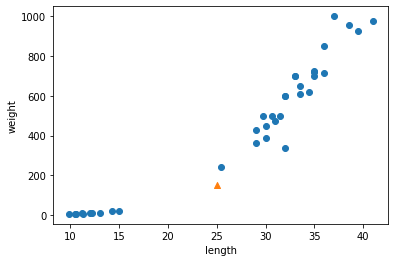

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( train_input[ : ,0 ] , train_input[ : , 1 ] )
plt.scatter( 25 , 150 , marker = "^" ) # 새로 추가한 내용의 마커를 다른 표본과는 구분된 문양으로 실행
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

분명히 새로 추가한 데이터는 도미 쪽과 더 가까운데 <br>
왜 빙어라고 추측을 하는 걸까 ? 

k-최근접 이웃 : 주변의 샘플 중에서 다수인 클래스를 예측으로 사용 <br>
이 샘플의 주변 샘플을 알아보자.

KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아 주는 <br> kneighbors() 메서드 제공 <br>
: 이웃까지의 거리와 이웃 샘플의 인덱스를 반환 <br>
KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors 의 기본값 : 5 <br>
5개의 이웃이 반환됨

In [ ]:
distances , indexes = kn.kneighbors( [ [ 25 , 150 ] ] )

이전 절에서 넘파이 배열 인덱싱 배웠음 , 여기서도 동일한 방법 사용 <br>
indexes 배열을 사용하여 훈련 데이터 중에서 이웃 샘플을 따로 굽누해 그려보기

Text(0, 0.5, 'weight')

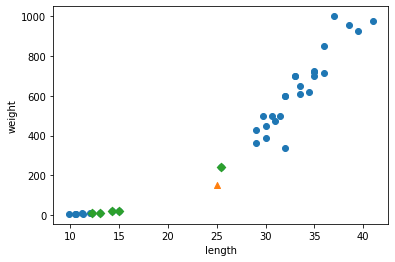

In [ ]:
plt.scatter(train_input[ : , 0] , train_input[ : , 1 ] ) 
plt.scatter( 25 , 150 , marker = "^" ) 
plt.scatter( train_input[ indexes , 0 ] , train_input[ indexes , 1 ] , marker = 'D' ) 
# marker = 'D' : 마름모로 그리기
plt.xlabel( 'length' )
plt.ylabel( 'weight' )

가장 가까운 이웃에 도미가 하나밖에 없기 때문에 도미가 아닌 빙어로 출력된 것 <br>
직접 이웃된 데이터 확인하기

In [ ]:
print( train_input[ indexes ] )

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


타깃 데이터로 확인하면 더 병확하다.

In [ ]:
print(train_target[ indexes ] )

[[1. 0. 0. 0. 0.]]


### 이 문제의 해결 실마리 찾기 위해 
<br>
kneighbors() 메서드에 반환한 distances 배열을 출력해 보기 <br>
: 이웃 샘플까지의 거리가 담겨 있음

In [ ]:
print( distances )

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 기준을 맞춰라

산점도를 다시 살펴보면 , 삼각형 샘플에 가장 가까운 첫 번째 샘플까지의 거리는 92 <br>
그 외 가장 가까운 샘플들은 모두 130 , 138 

그런데 92와 130의 차이가 그래프상으로는 족히 몇 배는 되어보인다.
<br> x축( 생선의 길이 )은 범위가 좁고( 10 ~ 40 )  <br>y축( 생선의 무게 )은 범위가 넓다( 0 ~ 1000 )

그래서 이를 눈으로 명확히 하기 위해 x축의 범위를 동일하게 0 ~ 1000 으로 설정 <br>
x축 범위를 지정하려면 xlim() 함수를 사용 // 비슷하게 y축 범위를 설정하려면 ylim() 함수를 사용

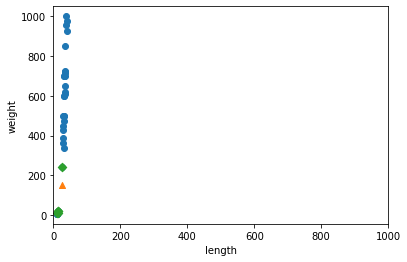

In [ ]:
plt.scatter( train_input[ : , 0 ] , train_input[ : , 1 ] )
plt.scatter(25 , 150 , marker = "^")
plt.scatter( train_input[ indexes , 0 ] , train_input[ indexes , 1 ] , marker = "D" )
plt.xlim( ( 0 , 1000 ) )
plt.xlabel( 'length' )
plt.ylabel( 'weight' )
plt.show()

산점도가 거의 일직선으로 나타난다. x축과 y축의 범위를 동일하게 맞췄더니 <br>
모든 데이터가 수직으로 늘어선 형태 - 오로지 생선의 무게 ( y축 ) 만 고려대상이 된다.

두 특성( 길이와 무게 ) 값이 놓인 범위가 매우 다르다. <br>
이를 두 특성의 <strong>스케일</strong>이 다르다고 한다.

데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. <br>
알고리즘이 거리 기반일 때 특히 그렇다. 여기에는 k-최근접 이웃도 포함됨 <br>

이런 알고리즘은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 <br>
특성값을 일정한 기준으로 맞춰 주어야 한다. 이런 작업을 <strong>데이터 전처리</strong> 라고 한다.

가장 널리 사용하는 전처리 방법 중 하나는 <strong>표준점수(혹은 z점수)</strong>이다. <br>
표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는 지를 나타낸다. <br>
이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

계산하는 방법 : 평균을 빼고 표준편차로 나누기 <br>
넘파이는 편리하게도 이 두 함수를 모두 제공

In [ ]:
mean = np.mean( train_input , axis = 0 )
# mean 함수는 평균을 계산 , axis = 0 : x축 기준으로 계산 ( 우리의 예제에서는 생선의 길이 )
std = np.std( train_input , axis = 0 )
# std 함수는 표준편차를 계산 , axis = 0 : x축 기준으로 계산

In [ ]:
# 계산된 평균과 표준편차를 출력
print( mean , std )

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환

In [ ]:
train_scaled = ( train_input - mean ) / std

이 식의 계산 과정 : <br>
train_input의 모든 행에서 mean에 있는 두 평균값을 빼준다. <br>
그다음 std에 있는 두 표준편차를 다시 모든 행에 적용한다. <br>
이런 넘파이 기능을 <strong>브로드캐스팅</strong> 이라고 부른다.

# 전처리 데이터로 모델 훈련하기

앞에서 표준점수로 변환한 train_scaled 만듦 <br>
이 데이터로 우리가 잘못 예측한 데이터를 다시 산점도로 그려보기

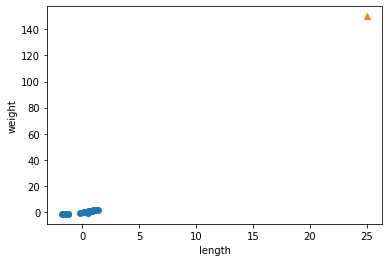

In [ ]:
plt.scatter( train_scaled[ : , 0 ] , train_scaled[ : , 1 ] ) 
plt.scatter( 25 , 150 , marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

새로 넣은 데이터는 표준화 작업 안했기 때문에 <br>
표준화된 데이터와는 동떨어져 있을 수밖에 없다.

그래서 새로운 데이터도 훈련 데이터의 평균과 표준편차를 반영하여 새로 적용하기

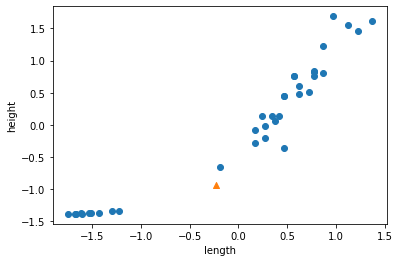

In [ ]:
new = ( [ 25 , 150 ] - mean ) / std
plt.scatter( train_scaled[ : , 0 ] , train_scaled[ : , 1 ] )
plt.scatter( new[ 0 ] , new[ 1 ] , marker = "^" )
plt.xlabel( "length" ) 
plt.ylabel( "height" )
plt.show()

이 그래프는 앞서 표준편차로 변환하기 전의 산점도와 거의 동일 <br>
크게 달라진 점은 x축과 y축의 범위가 -1.5 ~ 1.5 사이로 바뀌었다는 것 <br>
<strong>이제 이 데이터셋으로 k-최근접 이웃 모델 다시 훈련하기 </strong>

In [ ]:
kn.fit( train_scaled , train_target )

KNeighborsClassifier()

잘못된 결과를 출력한 데이터도 훈련 데이터의 평균 , 표준편차를 반영해서 입력했듯이 <br>
마찬가지로 테스트 세트도 훈련 세트의 평균과 표준편차로 변환해야 한다. <br>
<strong>"<테스트 세트의 스케일 변환>"</strong>

In [ ]:
test_scaled = ( test_input - mean ) / std

이제 모델 평가

In [ ]:
kn.score( test_scaled , test_target )

1.0

1.0 출력 : 테스트 세트를 완벽하게 분류해냄 <br>
그럼 아까의 잘못된 예제도 완벽하게 분류해낼 수 있을까 ? 

In [ ]:
print( kn.predict([ new ]))

[1.]


[1.] 출력 : 오 드디어 도미로 예측 
마지막으로 kneighbors() 함수로 이 샘플의 k-최근접 이웃을 구한 다음 <br>
산점도로 그려보기 <br>
특성을 표준점수로 바꾸었기 때문에 k-최근접 알고리즘이 올바르게 거리 측정했을 것 <br>
이로 인해 가장 가까운 이웃에 변화가 생겼을 것으로 기대할 수 있다.

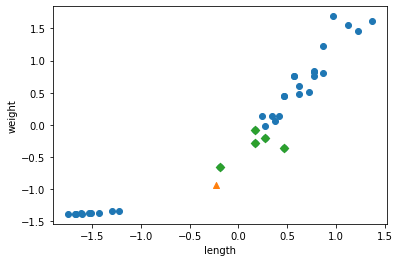

In [ ]:
distances , indexes = kn.kneighbors( [new] )
plt.scatter( train_scaled[ : , 0 ] , train_scaled[ : , 1 ] ) 
plt.scatter( new[ 0 ] , new[ 1 ] , marker = "^" ) 
plt.scatter( train_scaled[ indexes , 0 ] , train_scaled[ indexes , 1 ] , marker = "D" )
plt.xlabel('length')
plt.ylabel("weight")
plt.show()  

이제 새로운 예제의 가장 가까운 샘플들은 모두 도미이다. <br>
이제 이 수상한 샘플을 도미로 예측할 수 있게 되었다.